In [1]:
! pip install -q kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:

! cp kaggle.json ~/.kaggle/

In [4]:

! chmod 600 ~/.kaggle/kaggle.json

In [5]:

! kaggle datasets list

ref                                                    title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                     Vehicle Sales Data                               19MB  2024-02-21 20:16:17          16771        297  1.0              
sudarshan24byte/online-food-dataset                    Online Food Dataset                               3KB  2024-03-02 18:50:30           6330        113  0.9411765        
nbroad/gemma-rewrite-nbroad                            gemma-rewrite-nbroad                              8MB  2024-03-03 04:52:39            785         70  1.0              
arnavvvvv/spotify-music                                Top Spotify Songs                                47KB  2024-03-06 05:2

In [6]:
! kaggle competitions download -c digit-recognizer

 85% 13.0M/15.3M [00:01<00:00, 14.8MB/s]
100% 15.3M/15.3M [00:01<00:00, 9.16MB/s]


In [7]:
! unzip /content/digit-recognizer.zip

Archive:  /content/digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [8]:

import numpy as np
import pandas as pd
import os

train = pd.read_csv('/content/train.csv')
print(train.shape)
train.head()



(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test = pd.read_csv('/content/test.csv')
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
Y_train = train['label']
X_train = train.drop(labels=['label'],axis=1)

<ipython-input-11-fe9e8d594e71>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Y_train,palette='flare')


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

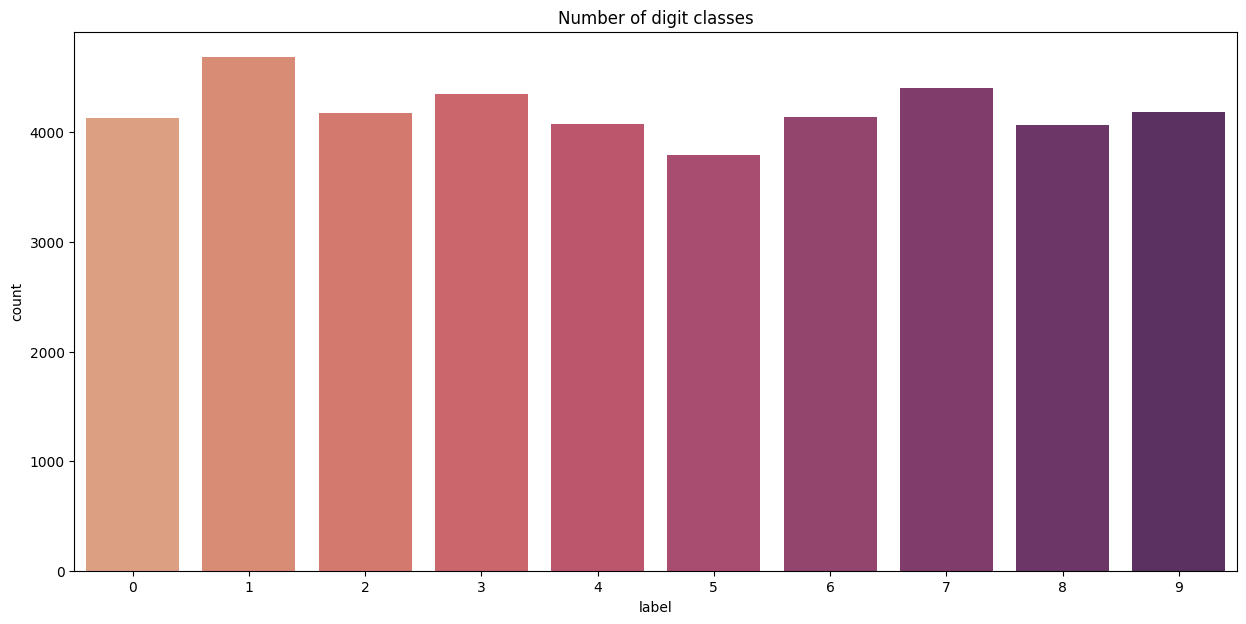

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,7))
sns.countplot(x=Y_train,palette='flare')
plt.title('Number of digit classes')
Y_train.value_counts()

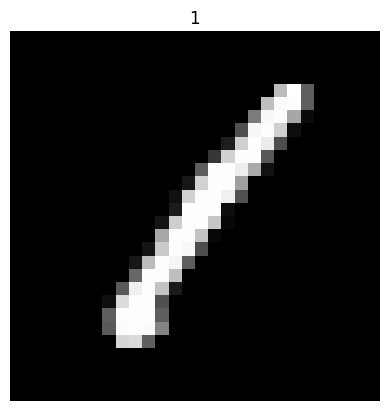

In [12]:
img = X_train.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis('off')
plt.show()

In [13]:
X_train = X_train/255.0
test = test / 255.0
print('x train shape: ',X_train.shape)
print('test shape : ',test.shape)

x train shape:  (42000, 784)
test shape :  (28000, 784)


In [14]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print('x train shape: ',X_train.shape)
print('test shape : ',test.shape)

x train shape:  (42000, 28, 28, 1)
test shape :  (28000, 28, 28, 1)


In [15]:
import tensorflow as tf
to_categorical = tf.keras.utils.to_categorical

In [16]:
Y_train = to_categorical(Y_train, num_classes = 10)
from sklearn.model_selection import train_test_split

X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size=0.1,random_state=2)

In [17]:
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

model = Sequential()

# First Convolution->Maxpooling->Dropout
model.add(Conv2D(filters=8, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Second Convolution->Maxpooling->Dropout
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# Flattening Layer
model.add(Flatten())

# First Hidden Layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Second Hidden Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Third Hidden Layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(10, activation='softmax'))

In [19]:
optimizer = Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)


In [20]:
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
epochs = 10
batch_size = 250

In [22]:
datagen = ImageDataGenerator(
featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0.5,
    zoom_range=0.5,
    width_shift_range=0.5,
    height_shift_range=0.5,
    horizontal_flip=False,
    vertical_flip=False
)

datagen.fit(X_train)

In [25]:
h = model.fit(datagen.flow(X_train,Y_train,batch_size=batch_size), epochs=epochs,validation_data=(X_val,Y_val),steps_per_epoch=X_train.shape[0]//batch_size)

Epoch 1/10
151/151 [==============================] - 11s 75ms/step - loss: 1.3145 - accuracy: 0.5533 - val_loss: 0.3521 - val_accuracy: 0.9048
Epoch 2/10
151/151 [==============================] - 24s 163ms/step - loss: 1.2976 - accuracy: 0.5615 - val_loss: 0.3327 - val_accuracy: 0.9105
Epoch 3/10
151/151 [==============================] - 16s 102ms/step - loss: 1.2956 - accuracy: 0.5605 - val_loss: 0.3519 - val_accuracy: 0.9090
Epoch 4/10
151/151 [==============================] - 12s 79ms/step - loss: 1.2873 - accuracy: 0.5666 - val_loss: 0.3121 - val_accuracy: 0.9169
Epoch 5/10
151/151 [==============================] - 12s 81ms/step - loss: 1.2738 - accuracy: 0.5746 - val_loss: 0.3068 - val_accuracy: 0.9140
Epoch 6/10
151/151 [==============================] - 12s 81ms/step - loss: 1.2660 - accuracy: 0.5765 - val_loss: 0.2720 - val_accuracy: 0.9317
Epoch 7/10
151/151 [==============================] - 14s 91ms/step - loss: 1.2638 - accuracy: 0.5758 - val_loss: 0.2854 - val_accurac

132/132 [==============================] - 1s 3ms/step


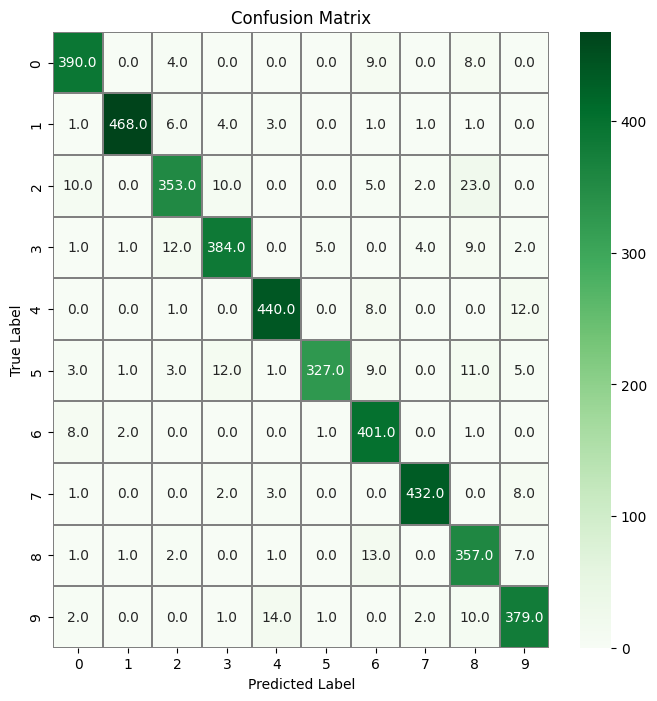

In [31]:
# confusion matrix
import seaborn as sns
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(Y_val,axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [32]:
model.save('Handwritten Digit recognition')

In [33]:
from keras.models import load_model
model = load_model("/content/Handwritten Digit recognition")

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 8)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 16)          0